In [26]:
#import image datagenerator library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   zca_epsilon=1e-06,
                                   horizontal_flip=True)

In [28]:
val_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
train_transform = train_datagen.flow_from_directory(r'./dataset/train',
                                            target_size=(100,100),
                                            batch_size=128,
                                            class_mode='categorical')

Found 7616 images belonging to 4 classes.


In [30]:
test_transform = val_datagen.flow_from_directory(r'./dataset/val',
                                            target_size=(100,100),
                                            batch_size=128,
                                            class_mode='categorical')

Found 2292 images belonging to 4 classes.


In [31]:
#to define linear initializations import Sequential
from tensorflow.keras.models import Sequential
#To add layers import Dense
from tensorflow.keras.layers import Dense
# to create a convolution kernel import Convolution2D
from tensorflow.keras.layers import Convolution2D
# Adding Max pooling Layer
from tensorflow.keras.layers import MaxPooling2D
# Adding Flatten Layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [32]:
# Initializing the model
model=Sequential()

In [33]:
model.add(Convolution2D(64,(3,3),input_shape=(100,100,3),activation='relu'))
model.add(MaxPooling2D(2,2))

In [34]:
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [35]:
model.add(Flatten()) 

In [36]:
model.output_shape

(None, 33856)

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)             0         
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Adding 1st hidden layer
model.add(Dense(kernel_initializer='uniform',activation='relu',units=150))

In [39]:
model.add(Dense(kernel_initializer='uniform',activation='relu',units=68))

In [40]:
model.add(Dense(kernel_initializer='uniform',activation='softmax',units=4))

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               5078550   
_________________________________________________________________
dense_5 (Dense)              (None, 68)               

In [43]:
res = model.fit_generator(train_transform,steps_per_epoch=7616//128,validation_steps=2292//128,epochs=30,
                          validation_data=test_transform)

Epoch 1/30
59/59 [==============================] - 133s 2s/step - loss: 1.2885 - acc: 0.3797 - val_loss: 0.7450 - val_acc: 0.6705
Epoch 2/30
59/59 [==============================] - 128s 2s/step - loss: 0.5155 - acc: 0.7988 - val_loss: 0.6814 - val_acc: 0.7146
Epoch 3/30
59/59 [==============================] - 128s 2s/step - loss: 0.4422 - acc: 0.8327 - val_loss: 0.5805 - val_acc: 0.7790
Epoch 4/30
59/59 [==============================] - 129s 2s/step - loss: 0.3510 - acc: 0.8766 - val_loss: 0.4852 - val_acc: 0.8263
Epoch 5/30
59/59 [==============================] - 128s 2s/step - loss: 0.3091 - acc: 0.8857 - val_loss: 0.4842 - val_acc: 0.8470
Epoch 6/30
59/59 [==============================] - 128s 2s/step - loss: 0.2588 - acc: 0.9090 - val_loss: 0.4213 - val_acc: 0.8534
Epoch 7/30
59/59 [==============================] - 128s 2s/step - loss: 0.2413 - acc: 0.9155 - val_loss: 0.3801 - val_acc: 0.8667
Epoch 8/30
59/59 [==============================] - 128s 2s/step - loss: 0.2148 - a

In [44]:
model.save('Mechanical-Parts-1.h5')

In [161]:
#import numpy library
import numpy as np
#import load_model method to load our saved model
from tensorflow.keras.models import load_model
#import image from keras.preprocessing
from tensorflow.keras.preprocessing import image
#loading our saved model file
model = load_model("Mechanical-Parts-1.h5")
img = image.load_img(r"dataset/val/washer/WM0803_2_5.png",
                     target_size=(100,100))

x=image.img_to_array(img) #converting in to array format

x=np.expand_dims(x,axis=0) #changing its dimensions as per our requirement 
#img_data=preprocess_input(x)
#img_data.shape

In [162]:
a=np.argmax(model.predict(x), axis=1)

In [163]:
index=['Bolt', 'Locatingpin', 'Nut', 'Washer', ]
result = str(index[a[0]])
result

'Washer'

In [164]:
import matplotlib.pyplot as plt

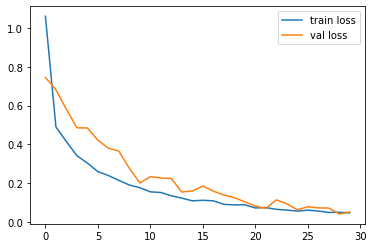

<Figure size 432x288 with 0 Axes>

In [165]:
# plot the loss
plt.plot(res.history['loss'], label='train loss')
plt.plot(res.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

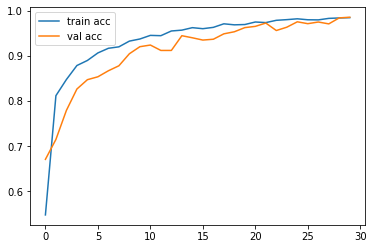

<Figure size 432x288 with 0 Axes>

In [166]:
# plot the accuracy
plt.plot(res.history['acc'], label='train acc')
plt.plot(res.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')